In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_fontja

In [63]:
### Excelデータを見てパラメータを設定
data_path = '../data/private/sample_data.xlsx'
sheet_name = 'N数'
col_start = 1
col_end = 102
row_start = 17
row_end = 118
drop_col_list = [2]
drop_row_list = [18]
drop_all_zero_col = False
drop_all_zero_rost = False

### Read data
df_full = pd.read_excel(data_path, sheet_name=sheet_name, header=row_start-1, index_col=col_start-1)

### Select a subset of the DataFrame
df_subset = df_full.iloc[:row_end-row_start, :col_end-col_start]

### Drop specified columns
df_subset.drop(columns=df_subset.columns[np.array(drop_col_list)-col_start-1], inplace=True)

### Drop specified rows
df_subset.drop(index=df_subset.index[np.array(drop_row_list)-row_start-1], inplace=True)

### Drop columns with all zero values
if drop_all_zero_col:
    df_subset = df_subset.loc[:, (df_subset != 0).any(axis=0)]

### Drop rows with all zero values
if drop_all_zero_rost:
    df_subset = df_subset.loc[(df_subset != 0).any(axis=1), :]

df_subset.head()

,model001,model002,model003,model004,model005,model006,model007,model008,model009,model010,...,model091,model092,model093,model094,model095,model096,model097,model098,model099,model100
model001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
model002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
model003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
model004,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
model005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,model062,model063,model064,model065,model066,modelA,modelB,modelC,modelABC
model046,1,0,0,0,4,1,0,4,5
model097,0,1,0,1,1,0,1,2,3
model068,1,0,1,0,0,1,1,0,2
model070,1,1,0,0,0,1,1,0,2
model076,0,1,0,1,0,0,1,1,2
model090,0,0,1,0,0,0,1,0,1
model087,0,0,0,1,0,0,0,1,1
model086,0,1,0,0,0,0,1,0,1
model083,0,0,0,1,0,0,0,1,1
model074,0,1,0,0,0,0,1,0,1


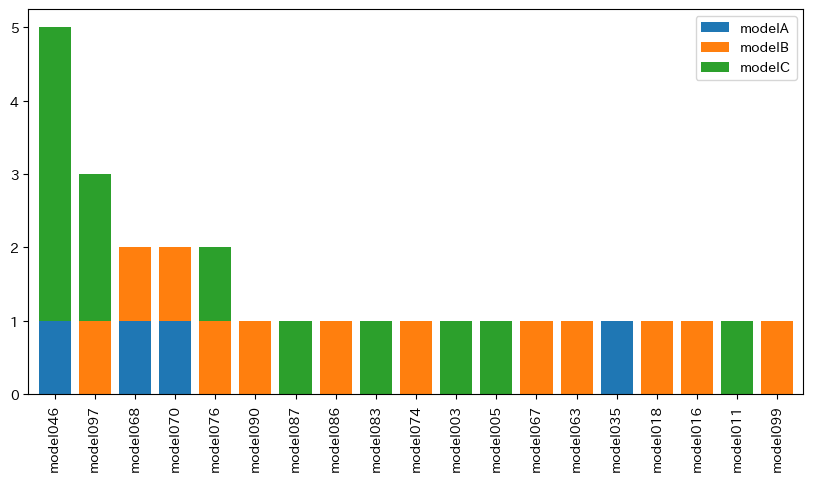

In [83]:
### Analysis 1
target_list = ['model062', 'model063', 'model064', 'model065', 'model066']
totalling_param_list = [
    {'totalled_value_name': 'modelA',
     'totalling_values': ['model062']},
    {'totalled_value_name': 'modelB',
     'totalling_values': ['model063', 'model064']},
    {'totalled_value_name': 'modelC',
     'totalling_values': ['model065', 'model066']},
    {'totalled_value_name': 'modelABC',
     'totalling_values': ['modelA', 'modelB', 'modelC']},
]
sorted_target = 'modelABC'

### Select a subset of the DataFrame for analysis 1
df_analysis1 = df_subset[target_list]

### Totalling columns
df_analysis1_total = df_analysis1.copy()
for param in totalling_param_list:
    df_analysis1_total[param['totalled_value_name']] = df_analysis1_total[param['totalling_values']].sum(axis=1)

### Drop rows with all zero values
df_analysis1_total = df_analysis1_total.loc[(df_analysis1_total != 0).any(axis=1), :]

### Sort the DataFrame by the specified column
df_analysis1_total.sort_values(by=sorted_target, ascending=False, inplace=True)

### Display the analysis result
display(df_analysis1_total)

### Figure
fig, ax = plt.subplots(figsize=(10, 5))
df_analysis1_total[['modelA', 'modelB', 'modelC']].plot(
    kind='bar', 
    stacked=True, 
    ax=ax, 
    width=0.8,
    legend=True
)
ax.set_xticklabels(df_analysis1_total.index)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('')
plt.legend()
plt.show()

,model062,model063,model064,model065,model066,modelA,modelB,modelC,modelABC
model043,0,1,2,0,0,0,3,0,3
model089,0,2,0,0,0,0,2,0,2
model005,0,0,1,0,0,0,1,0,1
model054,0,0,0,1,0,0,0,1,1
model096,1,0,0,0,0,1,0,0,1
model093,1,0,0,0,0,1,0,0,1
model088,0,1,0,0,0,0,1,0,1
model063,0,1,0,0,0,0,1,0,1
model061,0,0,0,0,1,0,0,1,1
model058,0,0,0,1,0,0,0,1,1


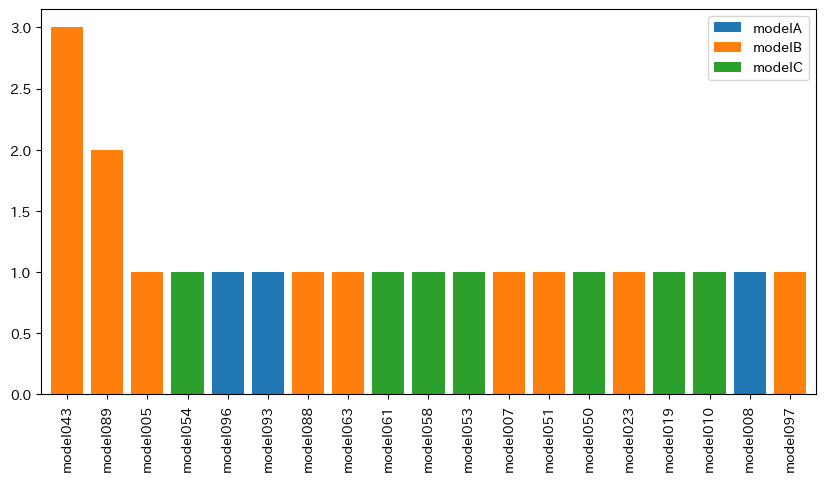

In [84]:
### Analysis 2
target_list = ['model062', 'model063', 'model064', 'model065', 'model066']
totalling_param_list = [
    {'totalled_value_name': 'modelA',
     'totalling_values': ['model062']},
    {'totalled_value_name': 'modelB',
     'totalling_values': ['model063', 'model064']},
    {'totalled_value_name': 'modelC',
     'totalling_values': ['model065', 'model066']},
    {'totalled_value_name': 'modelABC',
     'totalling_values': ['modelA', 'modelB', 'modelC']},
]
sorted_target = 'modelABC'

### Select a subset of the DataFrame for analysis 2
df_analysis2 = df_subset.T[target_list]

### Totalling columns
df_analysis2_total = df_analysis2.copy()
for param in totalling_param_list:
    df_analysis2_total[param['totalled_value_name']] = df_analysis2_total[param['totalling_values']].sum(axis=1)

### Drop rows with all zero values
df_analysis2_total = df_analysis2_total.loc[(df_analysis2_total != 0).any(axis=1), :]

### Sort the DataFrame by the specified column
df_analysis2_total.sort_values(by=sorted_target, ascending=False, inplace=True)

### Display the analysis result
display(df_analysis2_total)

### Figure
fig, ax = plt.subplots(figsize=(10, 5))
df_analysis2_total[['modelA', 'modelB', 'modelC']].plot(
    kind='bar', 
    stacked=True, 
    ax=ax, 
    width=0.8,
    legend=True
)
ax.set_xticklabels(df_analysis2_total.index)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('')
plt.legend()
plt.show()

In [87]:
### Analysis 3
target_list = df_analysis2_total.index.tolist()

### Select a subset of the DataFrame for analysis 1
df_analysis3 = df_subset[target_list]

### Drop rows with all zero values
df_analysis3 = df_analysis3.loc[(df_analysis3 != 0).any(axis=1), :]

display(df_analysis3)

,model043,model089,model005,model054,model096,model093,model088,model063,model061,model058,model053,model007,model051,model050,model023,model019,model010,model008,model097
model004,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
model005,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
model006,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
model008,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
model009,0,0,0,0,0,1,1,0,1,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
model093,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
model094,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
model096,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
model097,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [86]:
### Result
result_analysis1 = df_analysis1_total.index.tolist()
result_analysis2 = df_analysis2_total.index.tolist()
result_analysis3 = df_analysis3.index.tolist()
merged_list = list(set(result_analysis1 + result_analysis2 + result_analysis3))
display(merged_list)

['model099',
 'model055',
 'model058',
 'model078',
 'model024',
 'model036',
 'model038',
 'model066',
 'model053',
 'model023',
 'model041',
 'model051',
 'model085',
 'model025',
 'model086',
 'model062',
 'model074',
 'model057',
 'model008',
 'model067',
 'model035',
 'model022',
 'model060',
 'model068',
 'model007',
 'model091',
 'model009',
 'model093',
 'model064',
 'model059',
 'model076',
 'model046',
 'model075',
 'model043',
 'model065',
 'model061',
 'model003',
 'model018',
 'model011',
 'model010',
 'model017',
 'model083',
 'model040',
 'model069',
 'model012',
 'model077',
 'model084',
 'model063',
 'model072',
 'model031',
 'model080',
 'model094',
 'model096',
 'model006',
 'model004',
 'model090',
 'model097',
 'model087',
 'model054',
 'model016',
 'model071',
 'model088',
 'model089',
 'model037',
 'model013',
 'model070',
 'model015',
 'model050',
 'model079',
 'model019',
 'model005']